## Set df

In [44]:
import pandas as pd

df = pd.read_excel(r"C:\Users\hikar\Desktop\2025_radio\5_タイプ検証\timeline_type_分析後.xlsx")
df["year"] = pd.to_datetime(df["year"], format="%Y") #yearのフォーマットを数字から年月日に変更
df = df.set_index("year")

df_radio = df[["radio"]]
df_tv = df[["tv"]]
df_newspaper = df[["newspaper"]]
df_book = df[["book"]]
df_net = df[["internet"]]

## データの観察と前処理

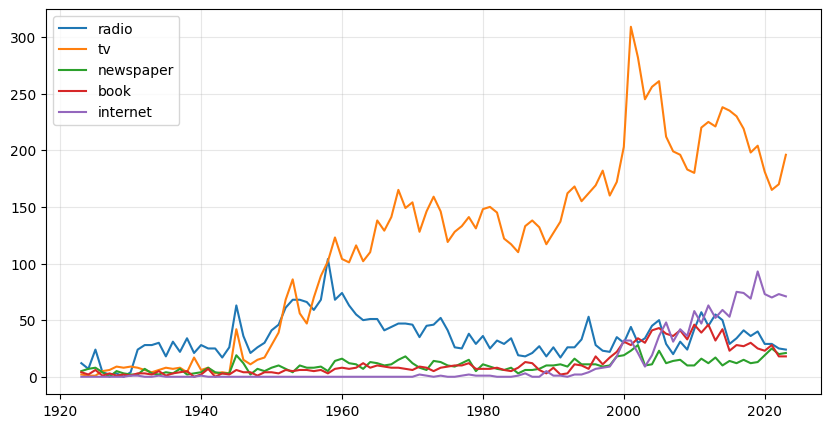

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))


plt.plot(df_radio.index, df_radio["radio"],label="radio")
plt.plot(df_tv.index,df_tv["tv"],label="tv")
plt.plot(df_newspaper.index,df_newspaper["newspaper"],label="newspaper")
plt.plot(df_book.index,df_book["book"],label="book")
plt.plot(df_net.index,df_net["internet"],label="internet")

plt.grid(True, linestyle="-", alpha=0.3)

plt.legend()

plt.show()

### STL分解

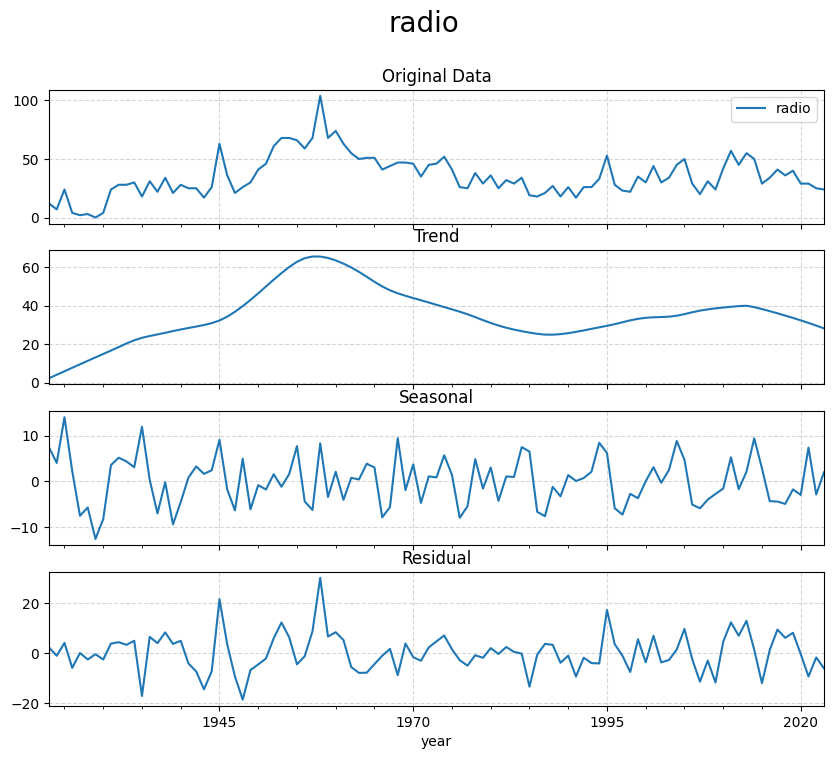

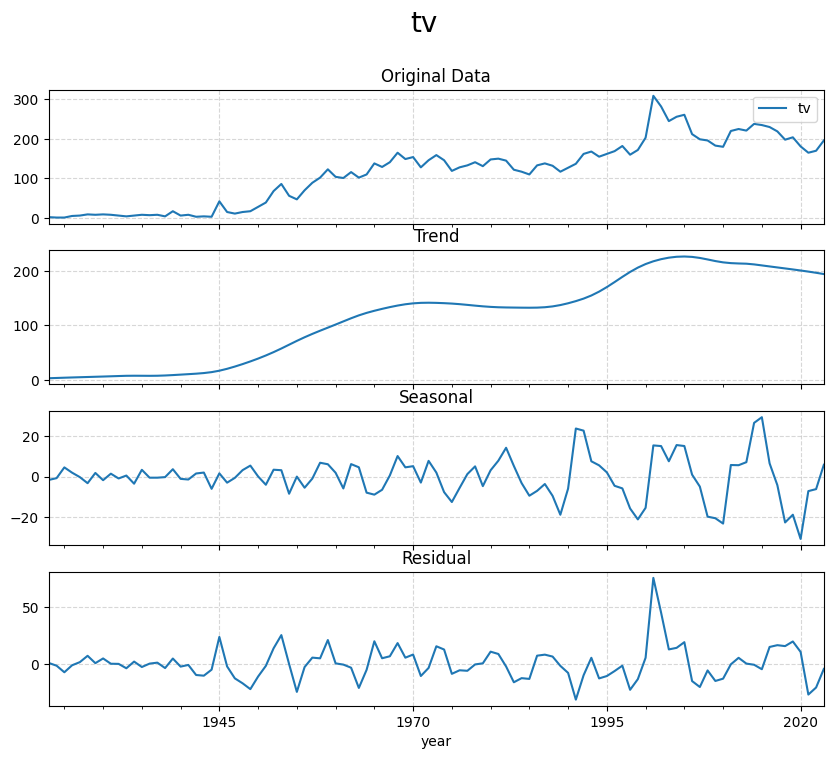

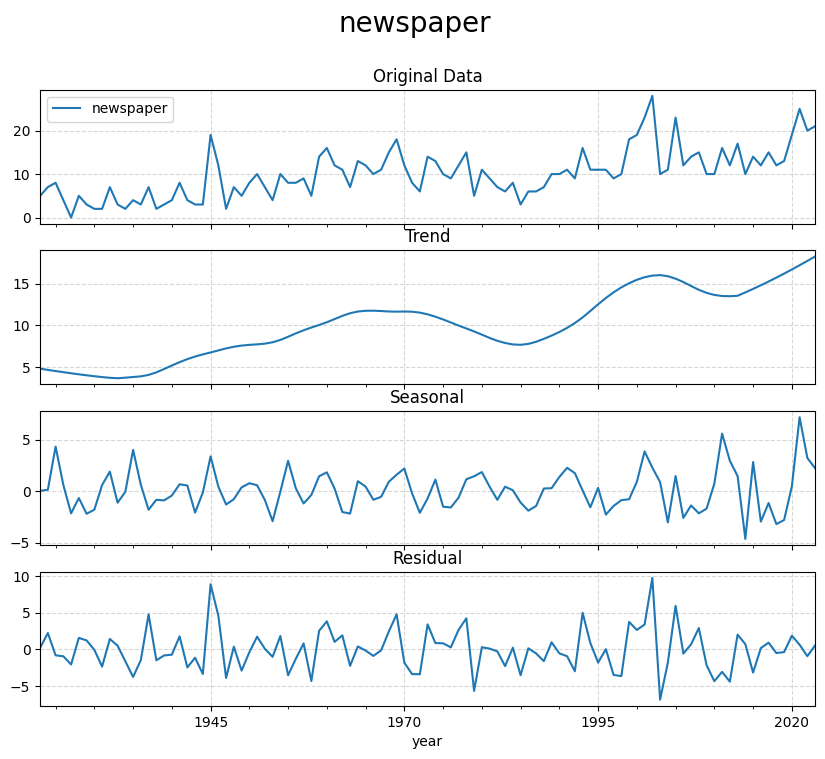

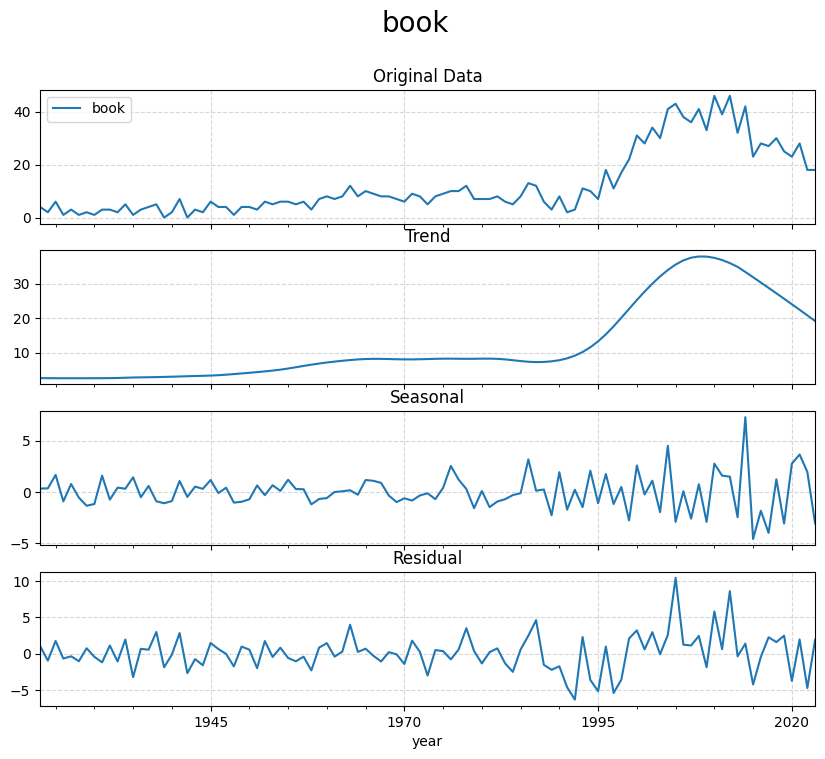

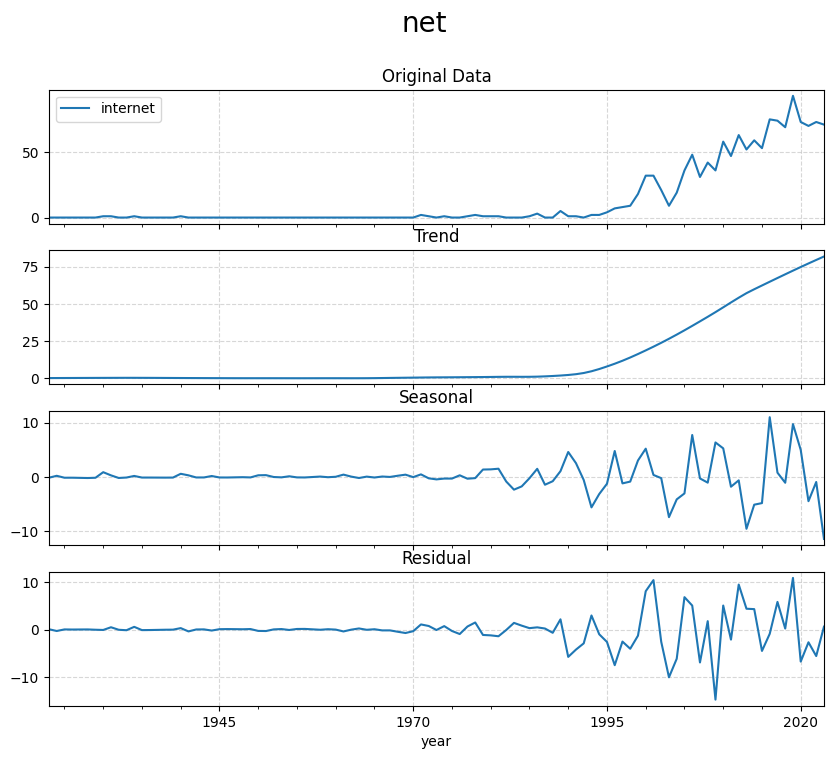

In [56]:
from statsmodels.tsa.seasonal import STL

types = ["radio", "tv", "newspaper", "book","net"]
for name in types:

    # 対象のデータフレームを取得
    df_stl = globals()[f"df_{name}"]  

    stl = STL(df_stl, period=10)
    res = stl.fit()

    # それぞれの成分を描画
    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    df_stl.plot(ax=axes[0])
    axes[0].grid(True, linestyle='--', alpha=0.5)
    axes[0].set_title('Original Data')

    res.trend.plot(ax=axes[1])
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_title('Trend')

    res.seasonal.plot(ax=axes[2])
    axes[2].grid(True, linestyle='--', alpha=0.5)
    axes[2].set_title('Seasonal')

    res.resid.plot(ax=axes[3])
    axes[3].grid(True, linestyle='--', alpha=0.5)
    axes[3].set_title('Residual')

    plt.suptitle(name, fontsize = 20)

    plt.show()


### ADF判定

検定量:定常さの指標。低いほど定常になる  
p値:このデータが非定常だと仮定した場合に、サンプルデータの再現確率。低いほど、非定常である確率を否定することになり、定常性が高いと言える。  
臨界値:p値が各割合な場合の検定量。これよりも検定量が低いことでその割合よりもp値が低く、つまり定常性が高いといえる。

In [47]:
from statsmodels.tsa.stattools import adfuller

types = ["radio", "tv", "newspaper", "book","net"]
for name in types:
    print(name)
    # ADF検定を実行
    result = adfuller(globals()[f"df_{name}"])
    # 結果表示
    print('統計検定量\t: %f' % result[0])
    print('p値\t: %f' % result[1])
    # p値の評価
    if result[1] < 0.05:
        print(name +"は定常と言える")
    else:
        print(name + "は定常とはいえない")
    print()

radio
統計検定量	: -2.981046
p値	: 0.036703
radioは定常と言える

tv
統計検定量	: -1.290092
p値	: 0.633693
tvは定常とはいえない

newspaper
統計検定量	: -1.890715
p値	: 0.336441
newspaperは定常とはいえない

book
統計検定量	: -1.543036
p値	: 0.512125
bookは定常とはいえない

net
統計検定量	: 2.461503
p値	: 0.999036
netは定常とはいえない



### 差分の除去

In [48]:
types = ["newspaper","book","tv", "net"]
for name in types:
    globals()[f"df_{name}_diff"] = globals()[f"df_{name}"].diff().dropna()
    print(globals()[f"df_{name}_diff"])

            newspaper
year                 
1924-01-01        2.0
1925-01-01        1.0
1926-01-01       -4.0
1927-01-01       -4.0
1928-01-01        5.0
...               ...
2019-01-01        1.0
2020-01-01        6.0
2021-01-01        6.0
2022-01-01       -5.0
2023-01-01        1.0

[100 rows x 1 columns]
            book
year            
1924-01-01  -2.0
1925-01-01   4.0
1926-01-01  -5.0
1927-01-01   2.0
1928-01-01  -2.0
...          ...
2019-01-01  -5.0
2020-01-01  -2.0
2021-01-01   5.0
2022-01-01 -10.0
2023-01-01   0.0

[100 rows x 1 columns]
              tv
year            
1924-01-01  -1.0
1925-01-01   0.0
1926-01-01   4.0
1927-01-01   1.0
1928-01-01   3.0
...          ...
2019-01-01   6.0
2020-01-01 -23.0
2021-01-01 -16.0
2022-01-01   5.0
2023-01-01  26.0

[100 rows x 1 columns]
            internet
year                
1924-01-01       0.0
1925-01-01       0.0
1926-01-01       0.0
1927-01-01       0.0
1928-01-01       0.0
...              ...
2019-01-01      24.0
2020-01-01 

In [49]:
print("df_tv_diff" in globals())
print("df_newspaper_diff" in globals())
print("df_book_diff" in globals())
print("df_net_diff" in globals())


True
True
True
True


### STL分解による確認

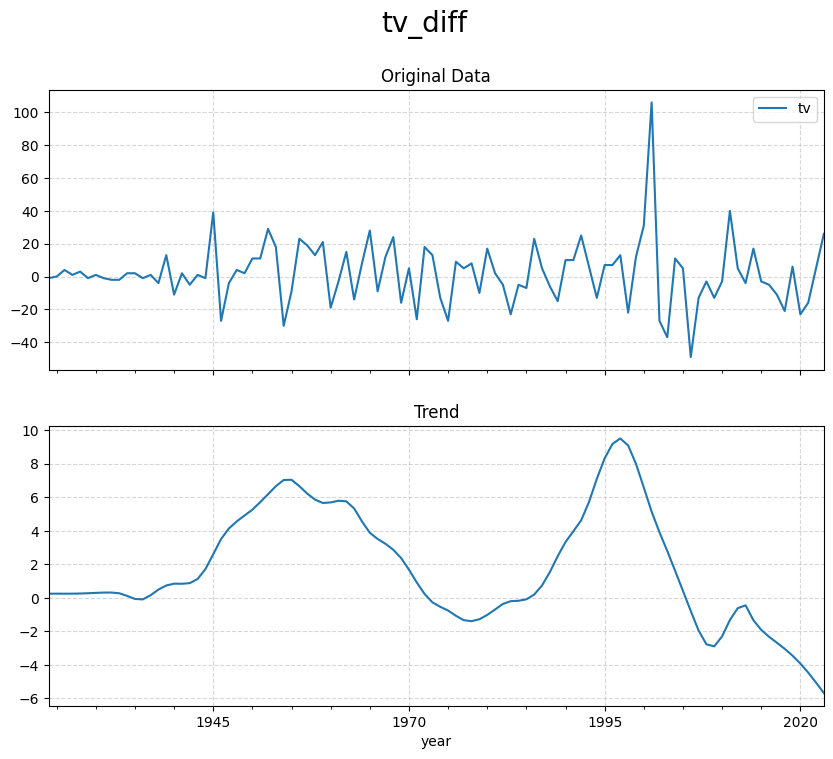

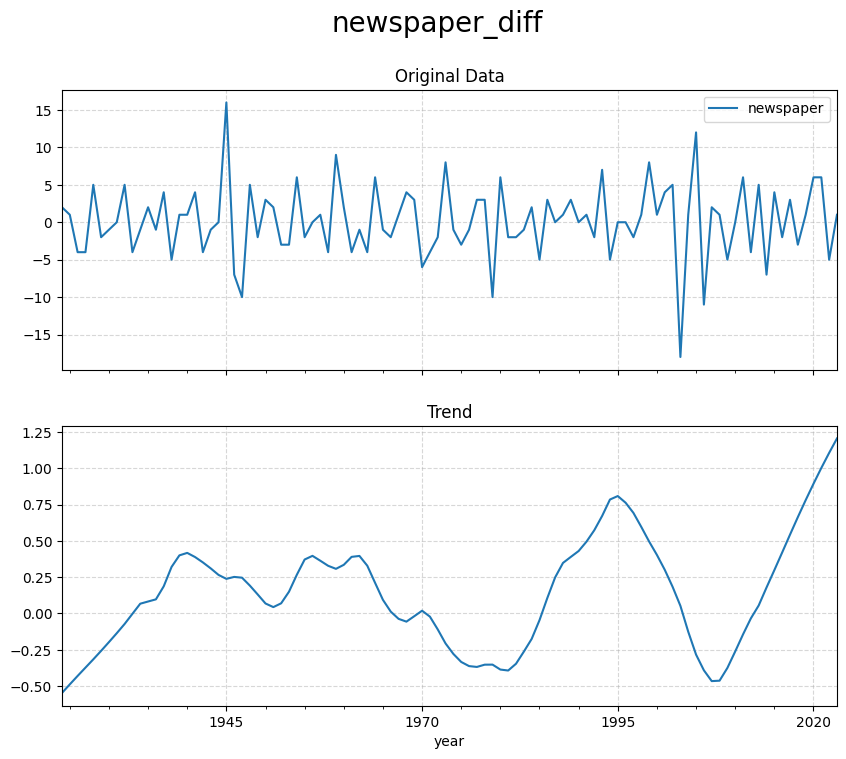

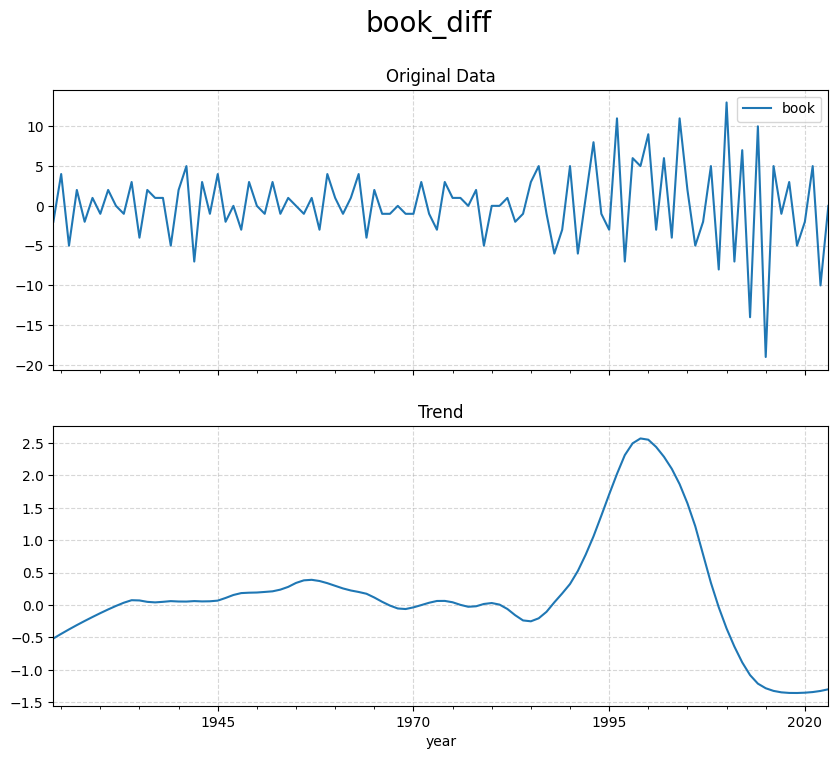

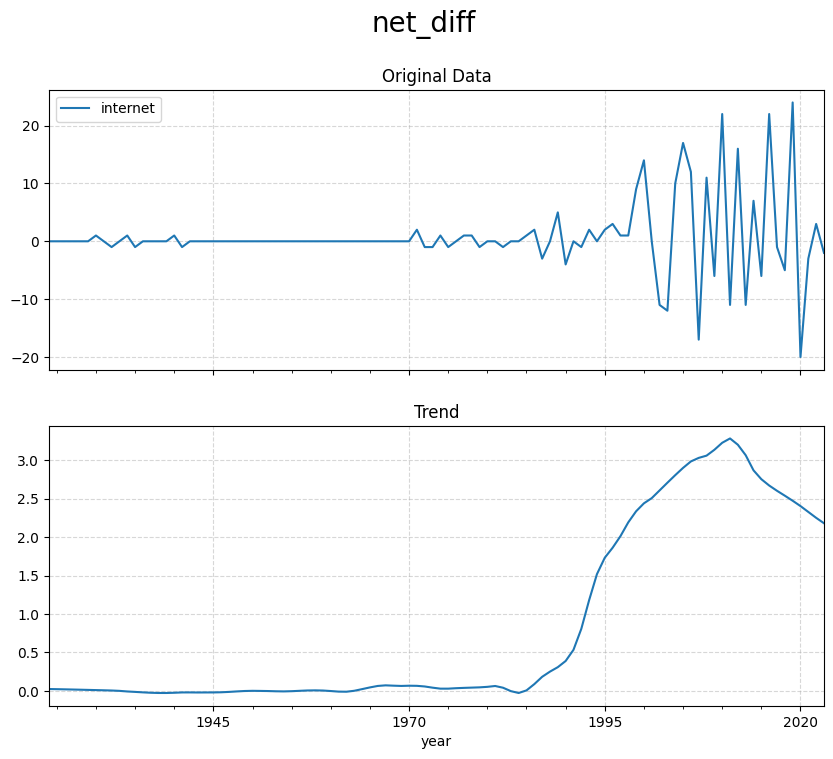

In [55]:
types = ["tv", "newspaper", "book","net"]
for name in types:

    # 対象のデータフレームを取得
    df_stl = globals()[f"df_{name}_diff"]  

    stl = STL(df_stl, period=10)
    res = stl.fit()

    # それぞれの成分を描画
    fig, axes = plt.subplots(2, 1, figsize=(10,8), sharex=True)

    df_stl.plot(ax=axes[0])
    axes[0].grid(True, linestyle='--', alpha=0.5)
    axes[0].set_title('Original Data')

    res.trend.plot(ax=axes[1])
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_title('Trend')

    plt.suptitle(name + "_diff", fontsize = 20)

    plt.show()

### ADF判定による確認

In [54]:
from statsmodels.tsa.stattools import adfuller

types = ["tv", "newspaper", "book","net"]
for name in types:
    print(name)
    # ADF検定を実行
    result = adfuller(globals()[f"df_{name}_diff"])
    # 結果表示
    print('統計検定量\t: %f' % result[0])
    print('p値\t: %f' % result[1])
    # p値の評価
    if result[1] < 0.05:
        print(name +"は定常といえる")
    else:
        print(name + "は定常とはいえない")
    print()

tv
統計検定量	: -8.641587
p値	: 0.000000
tvは定常といえる

newspaper
統計検定量	: -7.829625
p値	: 0.000000
newspaperは定常といえる

book
統計検定量	: -2.779355
p値	: 0.061284
bookは定常とはいえない

net
統計検定量	: -1.390375
p値	: 0.586882
netは定常とはいえない



### 差分の除去(再)

In [57]:
df_net_2 = df_net[df_net.index >= "1989-01-01"]
df_net_diff = df_net_2.diff().dropna()
print(df_net_diff)

            internet
year                
1990-01-01      -4.0
1991-01-01       0.0
1992-01-01      -1.0
1993-01-01       2.0
1994-01-01       0.0
1995-01-01       2.0
1996-01-01       3.0
1997-01-01       1.0
1998-01-01       1.0
1999-01-01       9.0
2000-01-01      14.0
2001-01-01       0.0
2002-01-01     -11.0
2003-01-01     -12.0
2004-01-01      10.0
2005-01-01      17.0
2006-01-01      12.0
2007-01-01     -17.0
2008-01-01      11.0
2009-01-01      -6.0
2010-01-01      22.0
2011-01-01     -11.0
2012-01-01      16.0
2013-01-01     -11.0
2014-01-01       7.0
2015-01-01      -6.0
2016-01-01      22.0
2017-01-01      -1.0
2018-01-01      -5.0
2019-01-01      24.0
2020-01-01     -20.0
2021-01-01      -3.0
2022-01-01       3.0
2023-01-01      -2.0


### STL分解による確認(再)

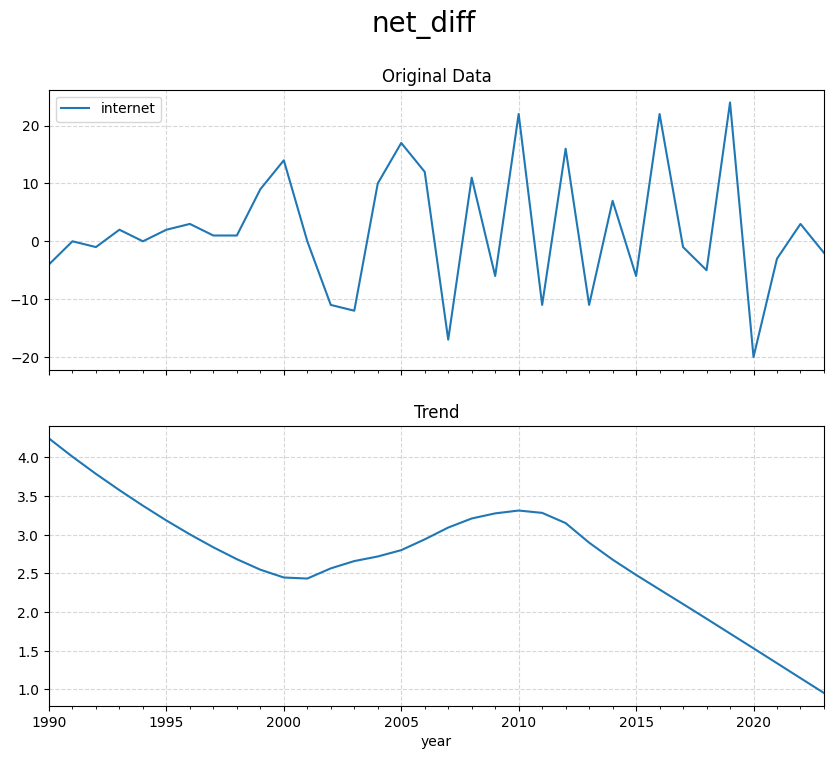

In [58]:
# 対象のデータフレームを取得
df_stl = df_net_diff 

stl = STL(df_stl, period=12)
res = stl.fit()

# それぞれの成分を描画
fig, axes = plt.subplots(2, 1, figsize=(10,8), sharex=True)

df_stl.plot(ax=axes[0])
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].set_title('Original Data')

res.trend.plot(ax=axes[1])
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].set_title('Trend')

plt.suptitle(name + "_diff", fontsize = 20)

plt.show()

In [61]:
from statsmodels.tsa.stattools import adfuller

# ADF検定を実行
result = adfuller(df_net_diff)
# 結果表示
print('統計検定量\t: %f' % result[0])
print('p値\t: %f' % result[1])
# p値の評価
if result[1] < 0.05:
    print(name +"は定常と言える")
else:
    print(name + "は定常とはいえない")

統計検定量	: -4.556824
p値	: 0.000155
netは定常と言える


## ARIMAでの予測